In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import time

import sys, os, glob
sys.path.insert(0, "../../")
import setigen as stg

/Users/bryanbrzycki/anaconda3/envs/seti/lib/python3.7/site-packages/h5py/__init__.py:40: UserWarning: h5py is running against HDF5 1.10.4 when it was built against 1.10.5, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [48]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s)

In [165]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s)

In [268]:
p = 2
tscint = 3
rho = stg.get_rho(frame.ts, tscint, p)
print(rho)

r = [0.74, 0.24]


Z = stg.build_Z(r, frame.tchans)
Y = stg.get_Y(Z)
print(stg.autocorrelation(Y, p+1)[1:])

[0.69988408 0.19850278]
[ 0.56303766 -0.0774782 ]


In [234]:
r = [ 0.73 , 0.22]
Z = stg.build_Z(r, 10000)
Y = stg.get_Y(Z)
result = stg.autocorrelation(Y, p+1)[1:]
print(result)

residuals = np.array(rho) - np.array(result)
print(residuals)
print('Error:', np.sqrt(sum(residuals**2)))

[0.69441472 0.19545913]
[0.00546936 0.00304365]
Error: 0.006259213844112285


In [239]:
results = np.array([ 0.73 , 0.22])

start = time.time()
for step in range(100):
    Z = stg.build_Z(results, 10000)
    Y = stg.get_Y(Z)
    result = stg.autocorrelation(Y, p+1)[1:]

    residuals = np.array(rho) - np.array(result)
    results += residuals
print(result)
print('Error:', np.sqrt(sum(residuals**2)))
print('Runtime: {} seconds'.format(time.time() - start))

[0.69993816 0.19640128]
Error: 0.0021022018591838
Runtime: 4.778550863265991 seconds


In [193]:
p = 3
tscint = 3
rho = stg.get_rho(frame.ts, tscint, p)
print('Rho:', rho)


r_next = rho.copy()

start = time.time()
for step in range(10):
    Z = stg.build_Z(r_next, 100)
    Y = stg.get_Y(Z)
    r = stg.autocorrelation(Y, p+1)[1:]

    residuals = np.array(rho) - np.array(r)
    r_next += residuals
print(r)
print('Error:', np.sqrt(sum(residuals**2)))
print('Runtime: {} seconds'.format(time.time() - start))

Rho: [ 0.42307692 -0.16666667 -0.18181818]
[ 0.37434449 -0.23713734 -0.19094613]
Error: 0.0861642905149699
Runtime: 0.01648998260498047 seconds


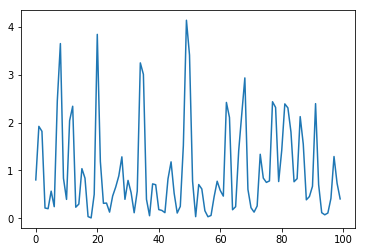

In [194]:
plt.plot(Y)

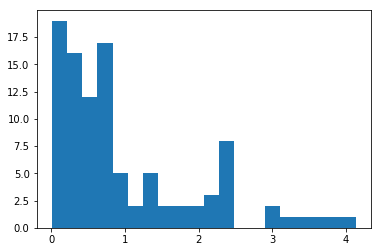

In [195]:
plt.hist(Y, bins=20)
plt.show()

In [227]:
# frame = stg.Frame(fchans=1024,
#                   tchans=32,
#                   df=1.3969838619232178*u.Hz,
#                   dt=1.4316557653333333*u.s)

frame = stg.Frame(fchans=1024,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s)

Z = stg.build_Z(r, frame.tchans)
Y = stg.get_Y(Z)
print(stg.autocorrelation(Y, p+1)[1:])

[-0.00780798 -0.44885756 -0.16488801]


In [228]:
noise = frame.add_noise_from_obs()
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], drift_rate=2*u.Hz/u.s),
                          Y * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

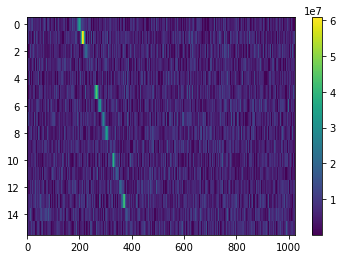

In [229]:
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()